In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import operator
import matplotlib.pyplot as plt
import numpy as np

In [15]:
url = "http://www.imdb.com/chart/top?ref_=nv_mv_250_6"
root_url = "http://www.imdb.com"

In [16]:
resp = requests.get(url)

In [17]:
##get soup of the main top250 page
soup = BeautifulSoup(resp.text,"lxml")

In [18]:
##extract the table of top movies
table_1 = soup.find("tbody",{'class':'lister-list'})

In [19]:
#iterating thru the table get all anchor tags
##which inturn take us to the movie page
##suffix it with the root url
movie_url_list = [root_url+movie["href"] for movie in table_1.find_all('a')]

In [20]:
all_actors = []
for i,movie_url in  enumerate(set(movie_url_list)):
    print(i)
    detailed_page = requests.get(movie_url)
    dpsoup = BeautifulSoup(detailed_page.text,"lxml")
    actors = dpsoup.find_all('span',{'itemprop':'actors'})
    actor_list = [actor.text.replace('\n','').strip() for actor in actors]
    all_actors.append(actor_list)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [24]:
actor_count = {}
for actors in all_actors:
    for actor in actors:
        if actor in actor_count:
            actor_count[actor]=actor_count[actor]+1
        else:
            actor_count[actor]=1
            

In [27]:
sorted_actor_count = sorted(actor_count.items(), key=operator.itemgetter(1))

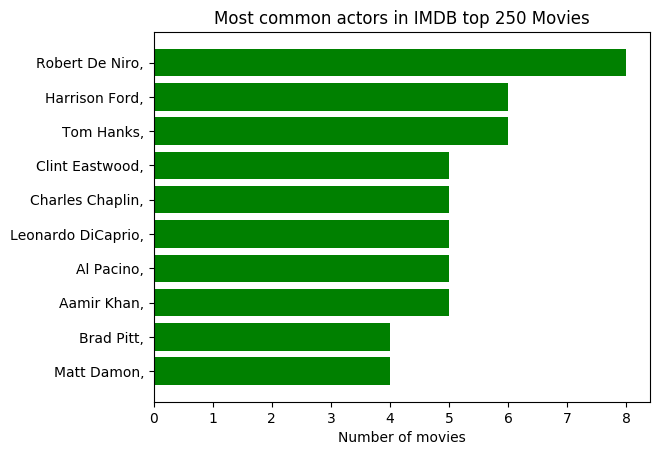

In [60]:
plt.rcdefaults()
fig, ax = plt.subplots()
names = [xx[0] for xx in sorted_actor_count[-10:]]
y = [yy[1] for yy in sorted_actor_count[-10:]]
y_pos = np.arange(len(names))
ax.barh(y_pos,y,align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of movies')
ax.set_title('Most common actors in IMDB top 250 Movies')
plt.show()

In [58]:
sorted_actor_count[-10:]

[('Matt Damon,', 4),
 ('Brad Pitt,', 4),
 ('Aamir Khan,', 5),
 ('Al Pacino,', 5),
 ('Leonardo DiCaprio,', 5),
 ('Charles Chaplin,', 5),
 ('Clint Eastwood,', 5),
 ('Tom Hanks,', 6),
 ('Harrison Ford,', 6),
 ('Robert De Niro,', 8)]